In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/2022%20March%20Laptop%20data/Cleaned_Laptop_data.csv")
data

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,ASUS,Celeron,Intel,Celeron Dual,Missing,4,DDR4,0,1024,Windows,...,15.6,1,No,No,23990,26990,11,3.8,15279,1947
1,ASUS,VivoBook,Intel,Core i3,10th,8,DDR4,512,0,Windows,...,15.6,1,No,No,37990,50990,25,4.3,990,108
2,ASUS,Vivobook,Intel,Core i3,10th,8,DDR4,0,1024,Windows,...,14.1,1,No,No,32890,46990,30,3.9,28,4
3,HP,Core,Intel,Core i3,11th,8,DDR4,512,0,Windows,...,15.6,1,No,Yes,42990,57330,25,4.4,158,18
4,HP,Core,Intel,Core i5,11th,8,DDR4,512,0,Windows,...,15.6,0,No,No,54990,70171,21,4.2,116,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,DELL,Core,Intel,Core i3,10th,8,DDR4,256,1024,Windows,...,15.6,0,No,No,46390,59101,21,2.9,95,5
892,DELL,Core,Intel,Core i3,10th,8,DDR4,0,1024,Windows,...,14.96,0,No,No,40390,54992,26,3.2,83,15
893,HP,Pavilion,Intel,Core i5,8th,8,DDR4,128,0,Windows,...,13.3,1,No,No,76012,0,0,4.3,129,16
894,ASUS,Vivobook,Intel,Core i3,10th,4,DDR4,0,1024,Windows,...,14.1,0,No,No,33990,39990,15,3.4,31,6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   895 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           871 non-null    object 
 6   ram_type         871 non-null    object 
 7   ssd              896 non-null    int64  
 8   hdd              896 non-null    int64  
 9   os               896 non-null    object 
 10  os_bit           896 non-null    int64  
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    object 
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

In [6]:
data.isna().sum()

brand               0
model               0
processor_brand     0
processor_name      1
processor_gnrtn     0
ram_gb             25
ram_type           25
ssd                 0
hdd                 0
os                  0
os_bit              0
graphic_card_gb     0
weight              0
display_size        0
warranty            0
Touchscreen         0
msoffice            0
latest_price        0
old_price           0
discount            0
star_rating         0
ratings             0
reviews             0
dtype: int64

In [7]:
data.ram_gb.value_counts(dropna=False)

8                503
16               239
4                102
NaN               25
32                12
15.6               6
NVIDIA             2
5                  1
Dual               1
Acer               1
Pre-installed      1
Full               1
Intel              1
Access             1
Name: ram_gb, dtype: int64

In [8]:
filter = data[data['ram_gb'].isin(['NVIDIA','Dual','Acer','Pre-installed','Full','Intel','Access',np.nan,'5'])]

In [9]:
index_list = filter.index
data.drop(index_list,inplace=True)

In [10]:
data.ram_gb.value_counts(dropna=False)

8       503
16      239
4       102
32       12
15.6      6
Name: ram_gb, dtype: int64

In [11]:
data.ram_gb = data.ram_gb.apply(lambda x: 16 if x=='15.6' else x).astype('int32')

In [12]:
data.brand.value_counts()  

ASUS         249
DELL         151
Lenovo       146
HP           139
acer          48
MSI           44
APPLE         28
Avita         18
Vaio           5
LG             5
ALIENWARE      4
Infinix        4
Nokia          4
realme         4
MICROSOFT      3
RedmiBook      3
Smartron       3
Mi             2
SAMSUNG        1
iball          1
Name: brand, dtype: int64

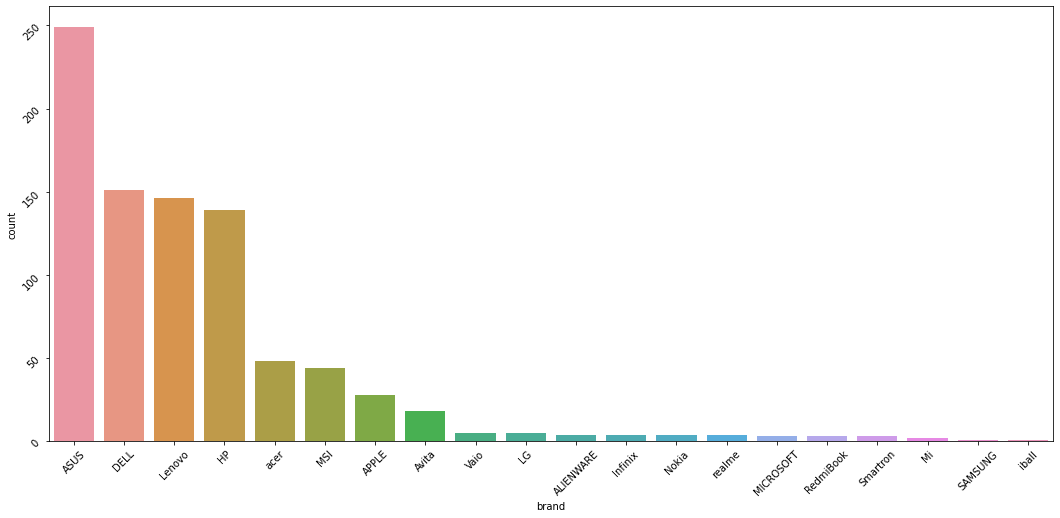

In [13]:
plt.figure(figsize=(18,8))             # fancy way to plot categorical data
sns.countplot(data=data,x='brand',order = data.brand.value_counts(ascending=False).index)
plt.tick_params(labelrotation=45)

<AxesSubplot:>

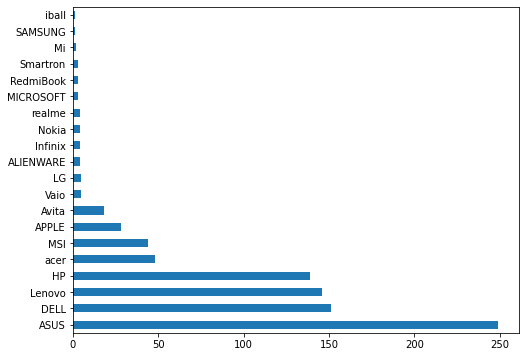

In [14]:
plt.figure(figsize=(8,6))
data.brand.value_counts().plot.barh()    

<AxesSubplot:xlabel='ram_gb', ylabel='count'>

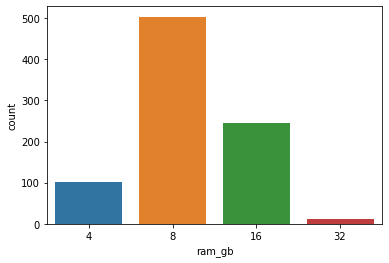

In [15]:
sns.countplot(data=data,x='ram_gb')

In [16]:
data.isna().sum()

brand              0
model              0
processor_brand    0
processor_name     0
processor_gnrtn    0
ram_gb             0
ram_type           0
ssd                0
hdd                0
os                 0
os_bit             0
graphic_card_gb    0
weight             0
display_size       0
warranty           0
Touchscreen        0
msoffice           0
latest_price       0
old_price          0
discount           0
star_rating        0
ratings            0
reviews            0
dtype: int64

<AxesSubplot:>

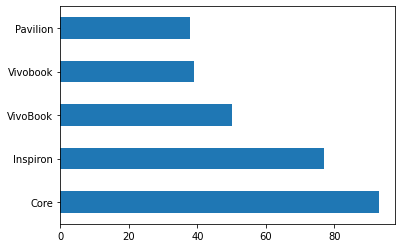

In [17]:
data.model.value_counts().head().plot.barh()

In [18]:
data.model = data.brand + " " + data.model
data.model.astype("str")

0       ASUS Celeron
1      ASUS VivoBook
2      ASUS Vivobook
3            HP Core
4            HP Core
           ...      
891        DELL Core
892        DELL Core
893      HP Pavilion
894    ASUS Vivobook
895       Lenovo v15
Name: model, Length: 862, dtype: object

In [19]:
data.model

0       ASUS Celeron
1      ASUS VivoBook
2      ASUS Vivobook
3            HP Core
4            HP Core
           ...      
891        DELL Core
892        DELL Core
893      HP Pavilion
894    ASUS Vivobook
895       Lenovo v15
Name: model, Length: 862, dtype: object

<AxesSubplot:>

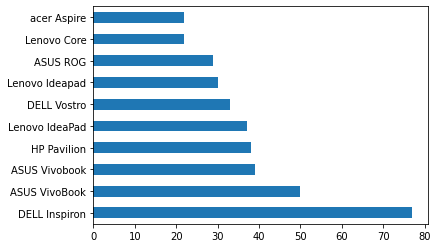

In [20]:
(data.model).value_counts().head(10).plot.barh()   

<AxesSubplot:>

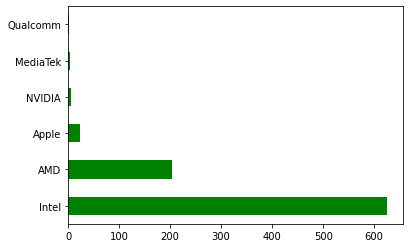

In [21]:
data['processor_brand'].value_counts().plot.barh(color = "g") 

<AxesSubplot:>

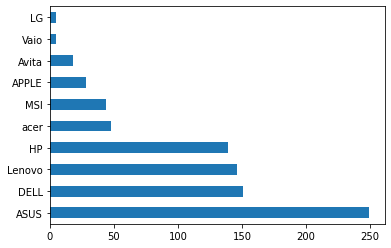

In [22]:
data.brand.value_counts().head(10).plot.barh() 

<AxesSubplot:>

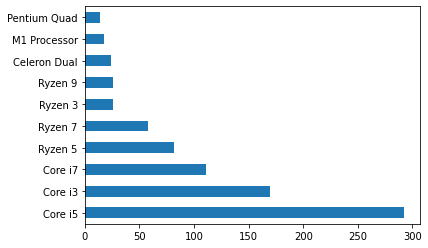

In [23]:
data['processor_name'].value_counts().head(10).plot.barh() 

In [24]:
data.columns

Index(['brand', 'model', 'processor_brand', 'processor_name',
       'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit',
       'graphic_card_gb', 'weight', 'display_size', 'warranty', 'Touchscreen',
       'msoffice', 'latest_price', 'old_price', 'discount', 'star_rating',
       'ratings', 'reviews'],
      dtype='object')

In [25]:
cols = ['brand','ram_gb','processor_brand','processor_name']

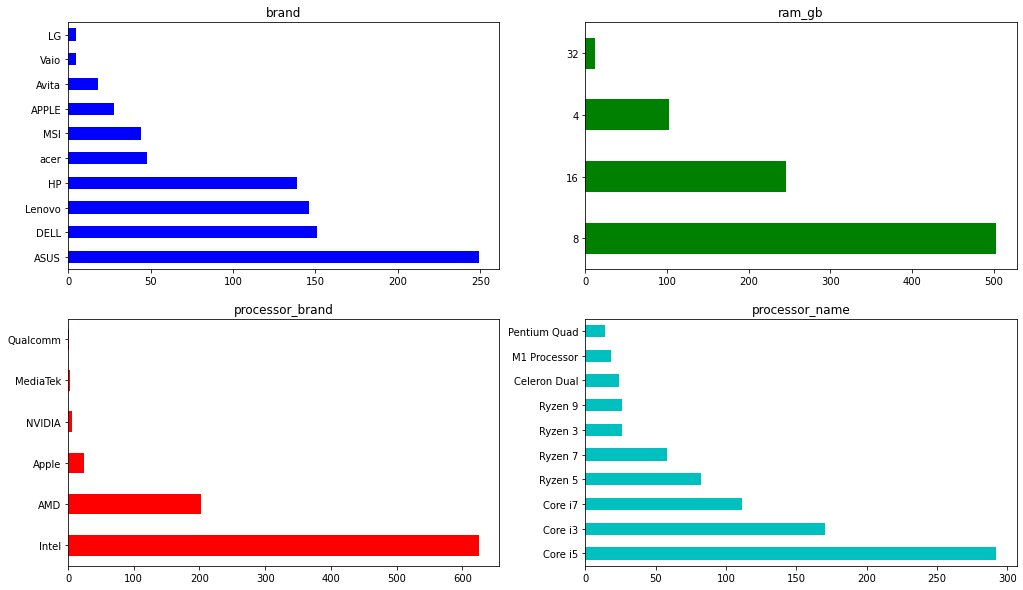

In [26]:
fig, axes = plt.subplots(2,2,figsize=(17,10))   
colors= ['b','g','r','c'] 
for i,ax in zip(range(len(cols)),axes.ravel()):   
    data[cols[i]].value_counts().head(10).plot.barh(ax=ax,title= cols[i],color = colors[i])

<AxesSubplot:xlabel='latest_price'>

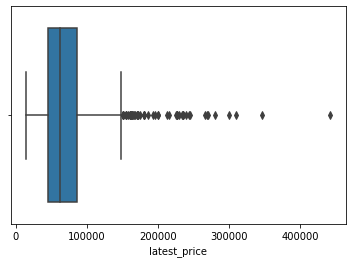

In [27]:
numerical_var_cols = ['latest_price','discount','star_rating','ratings','reviews']
sns.boxplot(data=data,x='latest_price')

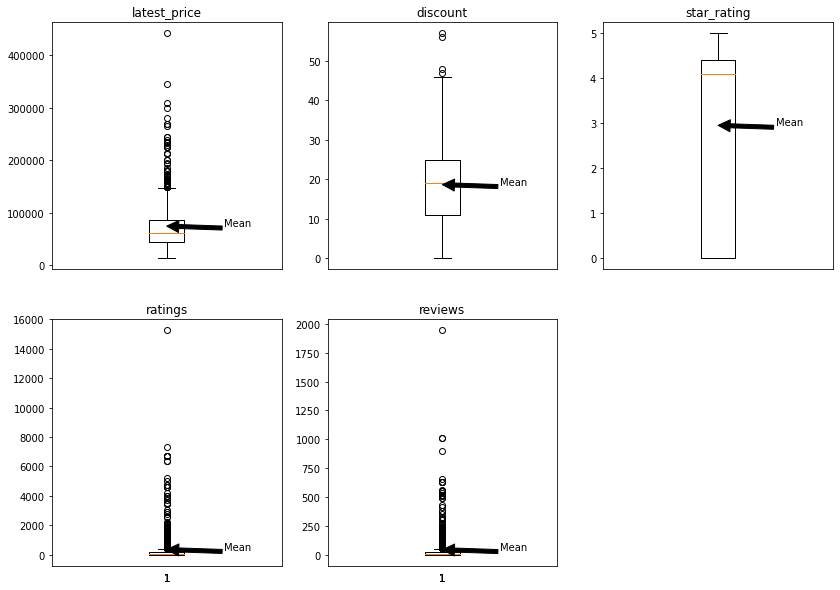

In [28]:
figure, axes = plt.subplots(2,3,figsize=(14,10),sharex= True)
for col,ax in zip(numerical_var_cols,axes.ravel()):
    ax.boxplot(data=data,x=col)
    ax.annotate("Mean",xy=(1,data[col].mean()),xytext=(1.25,data[col].mean()),arrowprops=dict(facecolor='black'))
    ax.set_title(col)
    ax.xaxis.set_ticks_position('none')
    axes[1,2].set_axis_off()

In [29]:
data["star_rating"].describe()

count    862.000000
mean       2.953944
std        1.972989
min        0.000000
25%        0.000000
50%        4.100000
75%        4.400000
max        5.000000
Name: star_rating, dtype: float64

In [30]:
data["star_rating"].value_counts()

0.0    259
4.4     91
4.3     82
4.5     63
4.2     61
4.1     36
4.7     35
4.0     34
4.6     34
3.8     29
3.9     24
4.8     23
3.7     16
5.0     16
3.4     10
3.6      9
3.3      8
3.5      7
3.0      6
4.9      4
2.8      3
3.2      3
2.5      2
3.1      2
1.7      1
2.7      1
2.3      1
2.0      1
2.9      1
Name: star_rating, dtype: int64

In [31]:
data[data['star_rating'] == 0]

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
42,Lenovo,Lenovo Core,Intel,Core i5,11th,8,DDR4,512,0,Windows,...,15.6,1,No,No,52990,84890,37,0.0,0,0
43,acer,acer Aspire,Intel,Core i3,11th,8,DDR4,256,0,Windows,...,15.6,1,No,No,38990,52999,26,0.0,0,0
77,Lenovo,Lenovo IdeaPad,Intel,Core i5,10th,8,DDR4,512,0,Windows,...,15.6,1,No,No,49990,79690,37,0.0,0,0
90,ASUS,ASUS VivoBook,Intel,Core i5,11th,8,DDR4,256,1024,Windows,...,15.6,1,No,No,52990,72990,27,0.0,0,0
99,ASUS,ASUS Zenbook,Intel,Core i7,11th,16,LPDDR4X,1024,0,Windows,...,14,1,Yes,Yes,104990,146990,28,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,Avita,Avita Liber,Intel,Core i7,8th,8,DDR4,256,0,Windows,...,14,0,No,No,73990,79990,7,0.0,0,0
876,Avita,Avita Liber,Intel,Core i7,8th,8,DDR4,256,0,Windows,...,14,0,No,No,73990,79990,7,0.0,0,0
877,Avita,Avita Liber,Intel,Core i7,8th,8,DDR4,256,0,Windows,...,14,0,No,No,73990,79990,7,0.0,0,0
878,Avita,Avita Liber,Intel,Core i7,8th,8,DDR4,256,0,Windows,...,14,0,No,No,73990,79990,7,0.0,0,0


<AxesSubplot:>

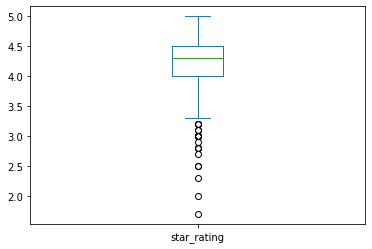

In [32]:
data2 = data[data.star_rating != 0]
data2.star_rating.plot(kind='box')

In [33]:
data2['rating_cat'] = pd.cut(data2['star_rating'],bins=[1,2,3,4,5],labels=['1-2','2-3','3-4','4-5'],include_lowest=True)

<ipython-input-33-52e6c492081c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['rating_cat'] = pd.cut(data2['star_rating'],bins=[1,2,3,4,5],labels=['1-2','2-3','3-4','4-5'],include_lowest=True)


In [34]:
data['latest_price'].describe()

count       862.000000
mean      74877.500000
std       45647.731463
min       13990.000000
25%       44922.500000
50%       62308.500000
75%       85990.000000
max      441990.000000
Name: latest_price, dtype: float64

In [35]:
data2['price_cat'] = pd.cut(data2['latest_price'],bins=[0,100000,200000,300000,400000,500000],labels=['<1lakh','1-2lakh','2-3lakhs','3-4lakhs','4-5lakhs'])

<ipython-input-35-f09d17777ae1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['price_cat'] = pd.cut(data2['latest_price'],bins=[0,100000,200000,300000,400000,500000],labels=['<1lakh','1-2lakh','2-3lakhs','3-4lakhs','4-5lakhs'])


In [36]:
data.discount.describe()

count    862.000000
mean      18.634571
std       10.383242
min        0.000000
25%       11.000000
50%       19.000000
75%       25.000000
max       57.000000
Name: discount, dtype: float64

In [37]:
data2['discount_cat'] = pd.cut(data2['discount'],bins=[0,10,20,30,40,50,60],labels=['<10','10-20','20-30','30-40','40-50','50-60'],include_lowest=True)

<ipython-input-37-16ce5c12be29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['discount_cat'] = pd.cut(data2['discount'],bins=[0,10,20,30,40,50,60],labels=['<10','10-20','20-30','30-40','40-50','50-60'],include_lowest=True)


In [38]:
category= ['rating_cat','price_cat','discount_cat']

In [39]:
for cat in category:
    print(data2.groupby(cat).brand.count())

rating_cat
1-2      2
2-3     14
3-4    142
4-5    445
Name: brand, dtype: int64
price_cat
<1lakh      526
1-2lakh      66
2-3lakhs      8
3-4lakhs      2
4-5lakhs      1
Name: brand, dtype: int64
discount_cat
<10      143
10-20    176
20-30    204
30-40     68
40-50     10
50-60      2
Name: brand, dtype: int64


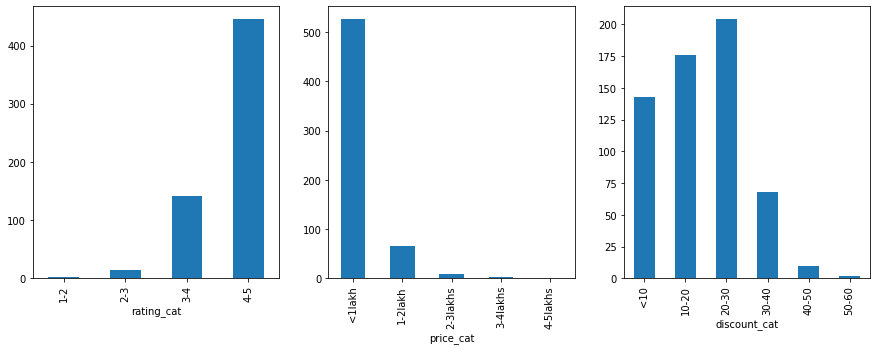

In [40]:
fig,axes= plt.subplots(1,3,figsize=(15,5))
for cat,ax in zip(category,axes.ravel()):
    data2.groupby(cat).brand.count().plot(kind='bar',x=cat,ax=ax)

In [41]:
data2['price_cat'].value_counts()

<1lakh      526
1-2lakh      66
2-3lakhs      8
3-4lakhs      2
4-5lakhs      1
Name: price_cat, dtype: int64

In [42]:
data2['price_cat'].value_counts()

<1lakh      526
1-2lakh      66
2-3lakhs      8
3-4lakhs      2
4-5lakhs      1
Name: price_cat, dtype: int64

In [43]:
data2['rating_cat'].value_counts()

4-5    445
3-4    142
2-3     14
1-2      2
Name: rating_cat, dtype: int64

<AxesSubplot:xlabel='latest_price', ylabel='star_rating'>

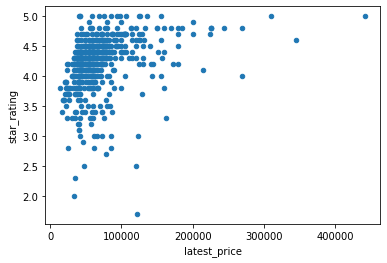

In [44]:
data2[['latest_price','star_rating']].plot(kind='scatter',x='latest_price',y='star_rating')

<AxesSubplot:xlabel='latest_price', ylabel='star_rating'>

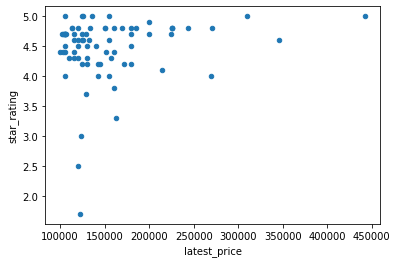

In [45]:
data2[data2['latest_price'] > 100000][['latest_price','star_rating']].plot(kind='scatter',x='latest_price',y='star_rating')  

In [46]:
data_low_rating_high_price = data2[(data2['star_rating'] < 1)&(data2['latest_price'] > 100000)]
data2[(data2['star_rating'] > 1)&(data2['latest_price'] > 100000)&(data2['star_rating'] < 3.5)]

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews,rating_cat,price_cat,discount_cat
421,Lenovo,Lenovo Yoga,Intel,Core i7,11th,16,LPDDR4X,1024,0,Windows,...,Yes,122990,167890,26,3.0,4,2,2-3,1-2lakh,20-30
495,DELL,DELL XPS,Intel,Core i7,8th,16,DDR3,512,0,Windows,...,Yes,121890,139104,12,1.7,3,0,1-2,1-2lakh,10-20
645,HP,HP Spectre,Intel,Core i7,10th,16,DDR4,512,0,Windows,...,No,162990,192977,15,3.3,3,1,3-4,1-2lakh,10-20
699,Lenovo,Lenovo Yoga,Intel,Core i7,10th,16,LPDDR4X,1024,0,Windows,...,No,119990,148082,18,2.5,2,1,2-3,1-2lakh,10-20


<AxesSubplot:>

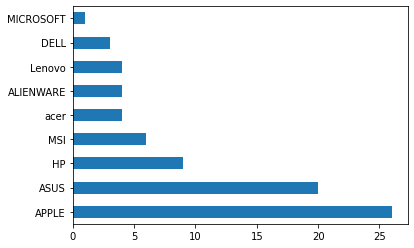

In [47]:
data2[data2['latest_price'] > 100000].brand.value_counts().plot.barh()

<AxesSubplot:>

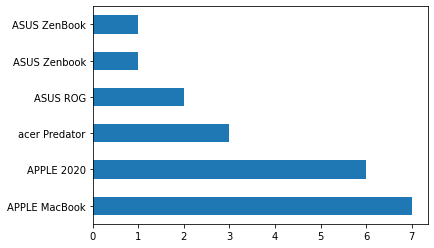

In [48]:
data[data['latest_price'] > 100000].model[:20].value_counts().plot.barh()

<AxesSubplot:ylabel='Density'>

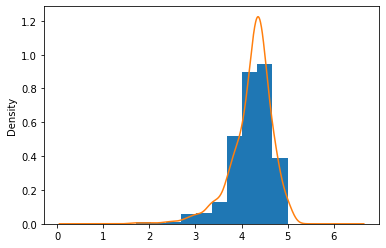

In [49]:
data2.star_rating.plot.hist(density=True)
data2.star_rating.plot.kde()

<AxesSubplot:xlabel='star_rating', ylabel='latest_price'>

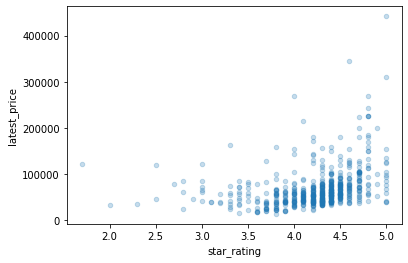

In [50]:
data2.plot(kind='scatter',x='star_rating',y='latest_price',alpha=0.25)  

<AxesSubplot:xlabel='star_rating', ylabel='latest_price'>

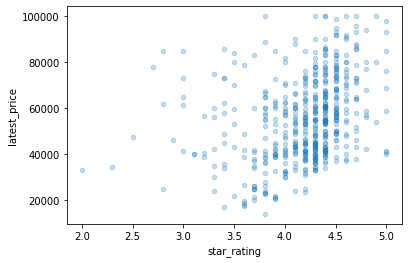

In [51]:
data2[(data2['star_rating'] > 1)&(data2['latest_price'] < 100000)].plot(kind='scatter',x='star_rating',y='latest_price',alpha=0.25)

<AxesSubplot:xlabel='star_rating', ylabel='latest_price'>

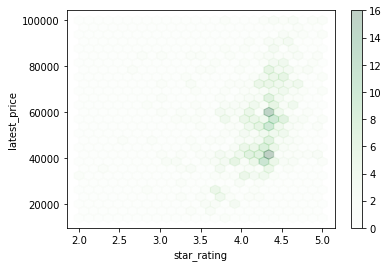

In [52]:
data2[(data2['star_rating'] > 1)&(data2['latest_price'] < 100000)].plot(kind='hexbin',x='star_rating',y='latest_price',alpha=0.25,cmap=plt.cm.Greens,sharex=False,gridsize=25)

In [53]:
data2[(data2['star_rating'] > 1)&(data2['latest_price'] < 100000)&(data2['star_rating'] <3)].processor_name.value_counts()

Core i3         3
Ryzen 5         2
Ryzen 7         1
Core i5         1
Celeron Dual    1
Name: processor_name, dtype: int64

In [55]:
data2[(data2['star_rating'] > 3)&(data2['latest_price'] < 100000)&(data2['star_rating'] <5)].ram_gb.value_counts()

8     355
16     75
4      74
Name: ram_gb, dtype: int64

<AxesSubplot:xlabel='star_rating', ylabel='discount'>

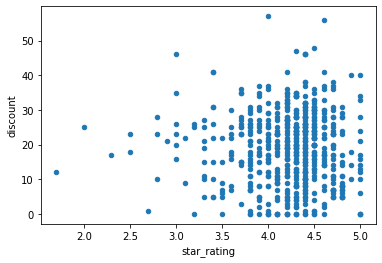

In [56]:
data2.plot(kind="scatter",x="star_rating",y='discount') 